In [1]:
# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 📂 Step 2: Load Cleaned Dataset
df = pd.read_csv("cleaned_telco_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [3]:
# 🛠️ Step 3: Drop Columns Not Useful for Prediction
# 'customerID' is an ID field — not helpful for learning patterns
df = df.drop('customerID', axis=1)

In [4]:
# 🔄 Step 4: Encode Categorical Features
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)

# Use one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()

Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [5]:
# 🎯 Step 5: Define Features (X) and Target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

In [6]:
# 🔀 Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training size: {X_train.shape[0]} rows")
print(f"Testing size: {X_test.shape[0]} rows")

Training size: 5625 rows
Testing size: 1407 rows


In [7]:
# 📏 Step 7: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# 🤖 Step 8: Train the Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [9]:
import joblib

# Save the full list of feature columns
feature_names = X.columns.tolist()
joblib.dump(feature_names, "features.pkl")

['features.pkl']

In [10]:
# 📈 Step 9: Make Predictions
y_pred = model.predict(X_test_scaled)

Accuracy: 0.7874911158493249

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



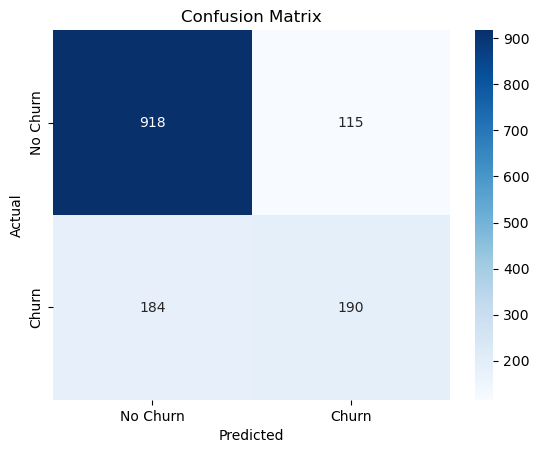

In [11]:
# ✅ Step 10: Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [12]:
# Save the model
joblib.dump(model, "model.pkl")

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [13]:
# 📄 Write the Streamlit app code into app.py
app_code = '''
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load model, scaler, and feature names
model = joblib.load("model.pkl")
scaler = joblib.load("scaler.pkl")
feature_names = joblib.load("features.pkl")

st.title("🔮 Customer Churn Predictor")
st.markdown("Enter customer details below to predict if they are likely to churn.")

# Input fields
gender = st.selectbox("Gender", ["Female", "Male"])
senior = st.selectbox("Senior Citizen", [0, 1])
partner = st.selectbox("Has Partner", ["Yes", "No"])
dependents = st.selectbox("Has Dependents", ["Yes", "No"])
tenure = st.slider("Tenure (months)", 0, 72, 12)
monthly_charges = st.number_input("Monthly Charges", 0.0, 200.0, 70.0)
total_charges = st.number_input("Total Charges", 0.0, 10000.0, 1000.0)

internet_service = st.selectbox("Internet Service", ["DSL", "Fiber optic", "No"])
online_security = st.selectbox("Online Security", ["Yes", "No", "No internet service"])
online_backup = st.selectbox("Online Backup", ["Yes", "No", "No internet service"])
device_protection = st.selectbox("Device Protection", ["Yes", "No", "No internet service"])
tech_support = st.selectbox("Tech Support", ["Yes", "No", "No internet service"])
streaming_tv = st.selectbox("Streaming TV", ["Yes", "No", "No internet service"])
streaming_movies = st.selectbox("Streaming Movies", ["Yes", "No", "No internet service"])
multiple_lines = st.selectbox("Multiple Lines", ["Yes", "No", "No phone service"])
contract = st.selectbox("Contract", ["Month-to-month", "One year", "Two year"])
paperless_billing = st.selectbox("Paperless Billing", ["Yes", "No"])
payment_method = st.selectbox("Payment Method", [
    "Electronic check", "Mailed check", "Bank transfer (automatic)", "Credit card (automatic)"
])

# Raw input dictionary
raw_input = {
    'gender': gender,
    'SeniorCitizen': senior,
    'Partner': partner,
    'Dependents': dependents,
    'tenure': tenure,
    'PhoneService': "Yes",  # default, to avoid missing in encoding
    'MultipleLines': multiple_lines,
    'InternetService': internet_service,
    'OnlineSecurity': online_security,
    'OnlineBackup': online_backup,
    'DeviceProtection': device_protection,
    'TechSupport': tech_support,
    'StreamingTV': streaming_tv,
    'StreamingMovies': streaming_movies,
    'Contract': contract,
    'PaperlessBilling': paperless_billing,
    'PaymentMethod': payment_method,
    'MonthlyCharges': monthly_charges,
    'TotalCharges': total_charges
}

# Create DataFrame
input_df = pd.DataFrame([raw_input])

# Perform one-hot encoding to match training
input_encoded = pd.get_dummies(input_df)

# Add any missing columns from training and set them to 0
for col in feature_names:
    if col not in input_encoded.columns:
        input_encoded[col] = 0

# Ensure column order matches training
input_encoded = input_encoded[feature_names]

# Scale numeric features
input_scaled = scaler.transform(input_encoded)

# Predict
if st.button("Predict Churn"):
    prediction = model.predict(input_scaled)[0]
    probability = model.predict_proba(input_scaled)[0][1]

    st.markdown("---")
    if prediction == 1:
        st.error(f"⚠️ This customer is likely to **churn**. (Confidence: {probability:.2%})")
    else:
        st.success(f"✅ This customer is likely to **stay**. (Confidence: {1 - probability:.2%})")

'''

# Save to app.py
with open("app.py", "w") as f:
    f.write(app_code)

print("✅ Streamlit app saved as app.py")

✅ Streamlit app saved as app.py
